In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

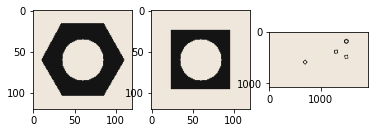

In [3]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

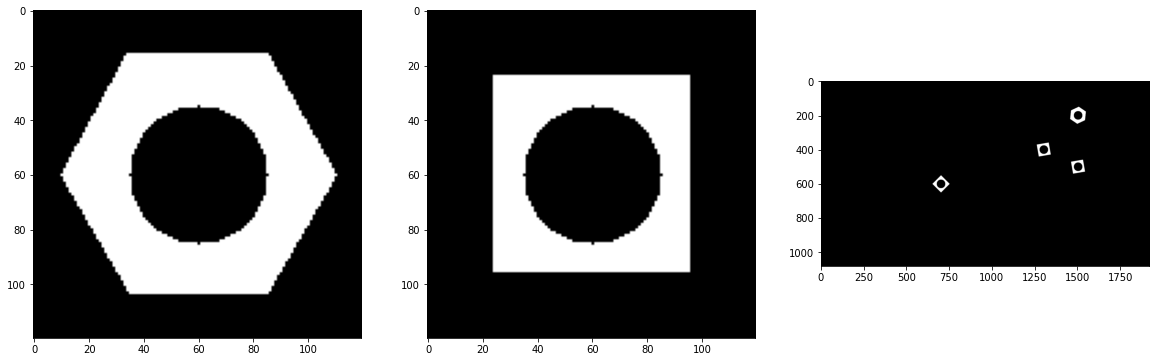

In [6]:
hexnut_gray = cv.cvtColor(hexnut_template, cv.COLOR_RGB2GRAY) 
squarenut_gray = cv.cvtColor(squarenut_template, cv.COLOR_RGB2GRAY)
conveyor_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)

ret1, hexnut_thrs = cv.threshold(hexnut_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret2, squarenut_thrs = cv.threshold(squarenut_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
ret3, conveyor_thrs = cv.threshold(conveyor_gray, 0 , 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

hexnut_thrs = cv.cvtColor(hexnut_thrs, cv.COLOR_RGB2BGR)
squarenut_thrs = cv.cvtColor(squarenut_thrs, cv.COLOR_RGB2BGR)
conveyor_thrs = cv.cvtColor(conveyor_thrs, cv.COLOR_RGB2BGR)

fig, ax = plt.subplots(1,3, figsize = (20,10))
ax[0].imshow(hexnut_thrs)
ax[1].imshow(squarenut_thrs)
ax[2].imshow(conveyor_thrs)
plt.show()


In [8]:
print("ret 1", ret1, '\nret 2', ret2, '\nret 3', ret3)

ret 1 20.0 
ret 2 20.0 
ret 3 20.0


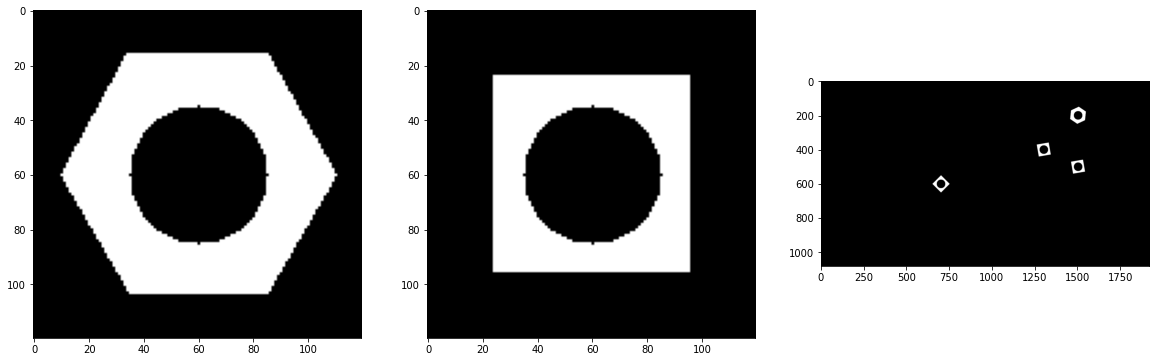

In [10]:
kernel = np.ones((3,3))

hexnut_close = cv.morphologyEx(hexnut_thrs, cv.MORPH_CLOSE, kernel)
squarenut_cloe = cv.morphologyEx(squarenut_thrs, cv.MORPH_CLOSE, kernel)
conveyor_close = cv.morphologyEx(conveyor_thrs, cv.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(1,3, figsize = (20,10))
ax[0].imshow(hexnut_thrs)
ax[1].imshow(squarenut_thrs)
ax[2].imshow(conveyor_thrs)
plt.show()

In [11]:
def component(image, w, h, a):
    width = w>10 and w<image.shape[0]-10
    height = h>10 and h<image.shape[1]-10
    area = a>100 and a<(image.shape[0]-10)*(image.shape[1]-10)
    if (weight and height and area):
        return True
    else:
        return False

In [32]:
def scan(img_thrs,img_original, thikness ):
    output = cv.connectedComponentsWithStats(img_thrs , 8, cv.CV_32S )
    (numLabels, labels, stats, centroids) = output

    print("Number of connected components =",numLabels-1)

    item_count = 0

    for i in range (0 , numLabels):
        
        x, y, width, height, area = stats[i]

        if component(img_thrs,width,height,area):
            item_count +=1

            print ("Item No :", item_count)
            print ("Area Is =" , area)
            print("Centroid is = ", int(centroids[i][0] + 0.5), int(centroids[i][1] + 0.5))
            print ("\n")
            
            image = cv.rectangle(img_original, (x, y), (x+width, y+height), (0, 255, 0), thikness)
            cv.putText(img_original, str(item_count), (x, y-2), cv.FONT_HERSHEY_SIMPLEX, image.shape[0]/500, (255, 0, 255), 1, cv.LINE_AA)

    return(img_original)

In [31]:
hex_nut = scan(hexnut_close, hexnut_template.copy(),1)

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(hex_nut, cmap='gray')
ax.set_title("HexNut Image")
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\connectedcomponents.cpp:5623: error: (-215:Assertion failed) L.channels() == 1 && I.channels() == 1 in function 'cv::connectedComponents_sub1'
